   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0 

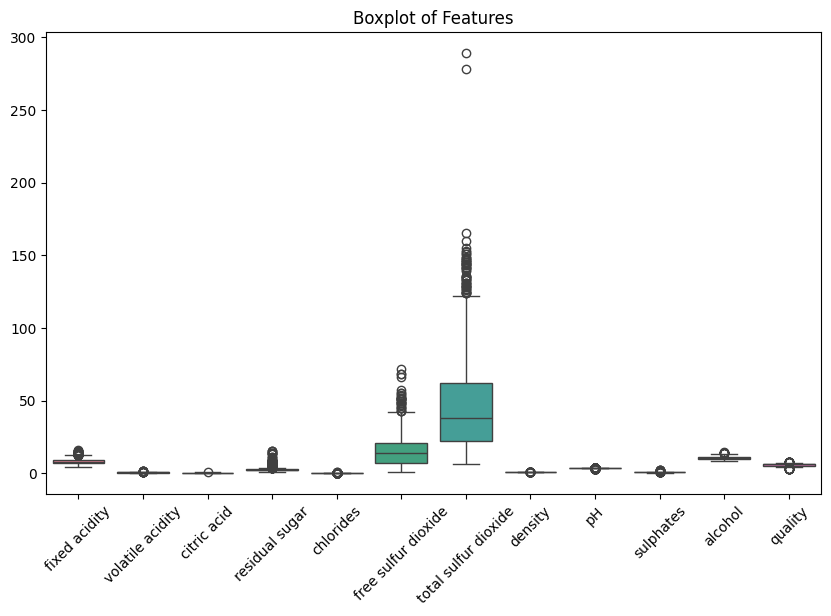

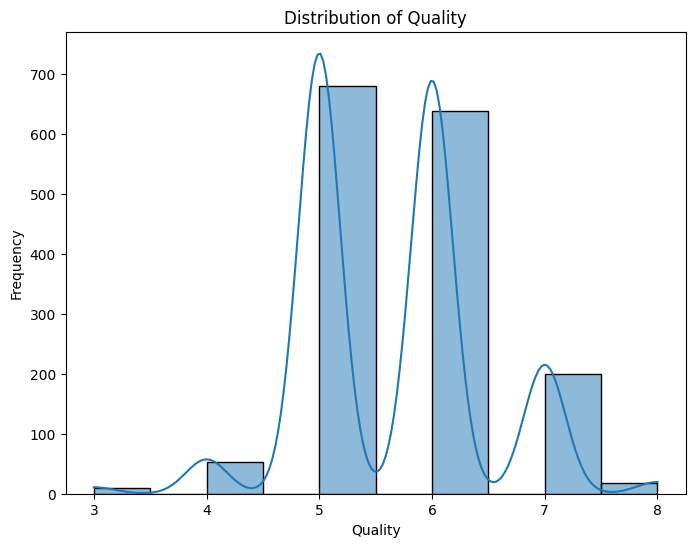

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel("major.xlsx")

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Summary statistics
print("Summary statistics:\n", data.describe())

# Check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

# Explore the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['quality'], bins=10, kde=True)
plt.title("Distribution of Quality")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.show()


Summary statistics after handling missing values and outliers:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1418.000000       1418.000000  1418.000000     1418.000000   
mean        8.300705          0.520737     0.265762        2.393794   
std         1.668869          0.167400     0.191389        0.869113   
min         5.000000          0.120000     0.000000        1.200000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.275000          0.630000     0.420000        2.600000   
max        13.500000          1.040000     0.790000        6.700000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1418.000000          1418.000000           1418.000000  1418.000000   
mean      0.081060            15.073343             43.037682     0.996701   
std       0.020977             9.282304             28.831266 

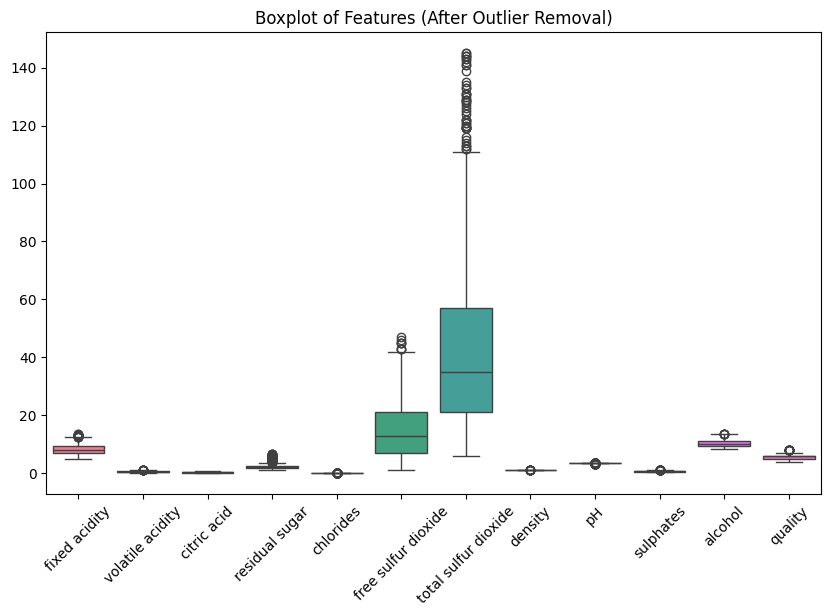

In [3]:
from sklearn.impute import SimpleImputer
from scipy import stats

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can choose different strategies like 'median' or 'most_frequent'
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Check for outliers
z_scores = np.abs(stats.zscore(data_imputed))
outlier_threshold = 3
outliers = np.where(z_scores > outlier_threshold)

# Remove outliers (optional)
data_cleaned = data_imputed[(z_scores < outlier_threshold).all(axis=1)]

# Summary statistics after handling missing values and outliers
print("Summary statistics after handling missing values and outliers:\n", data_cleaned.describe())

# Check for outliers again after removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned)
plt.title("Boxplot of Features (After Outlier Removal)")
plt.xticks(rotation=45)
plt.show()

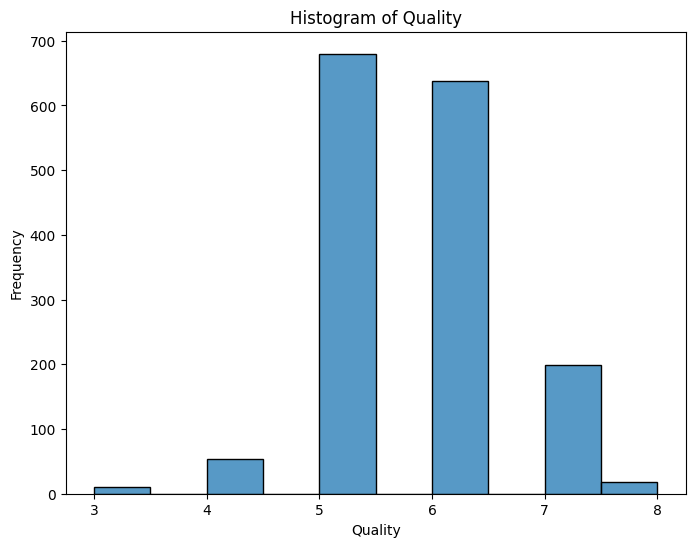

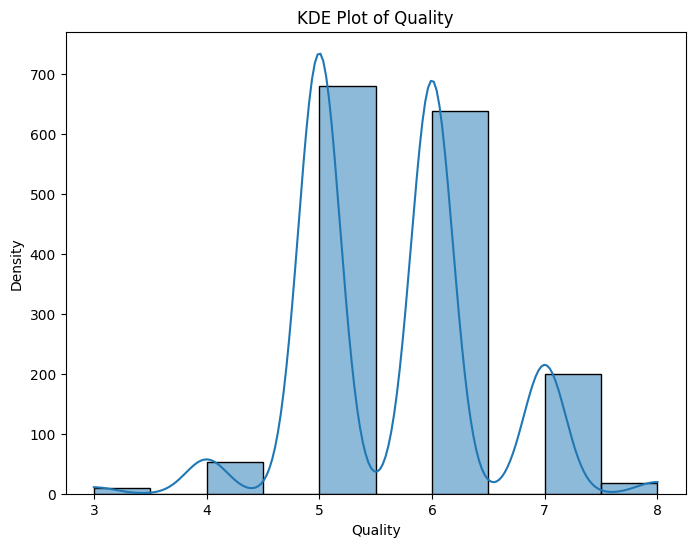

In [4]:

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['quality'], bins=10, kde=False)
plt.title("Histogram of Quality")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.show()

# Kernel Density Estimation (KDE) Plot
plt.figure(figsize=(8, 6))
sns.histplot(data['quality'], bins=10, kde=True)
plt.title("KDE Plot of Quality")
plt.xlabel("Quality")
plt.ylabel("Density")
plt.show()


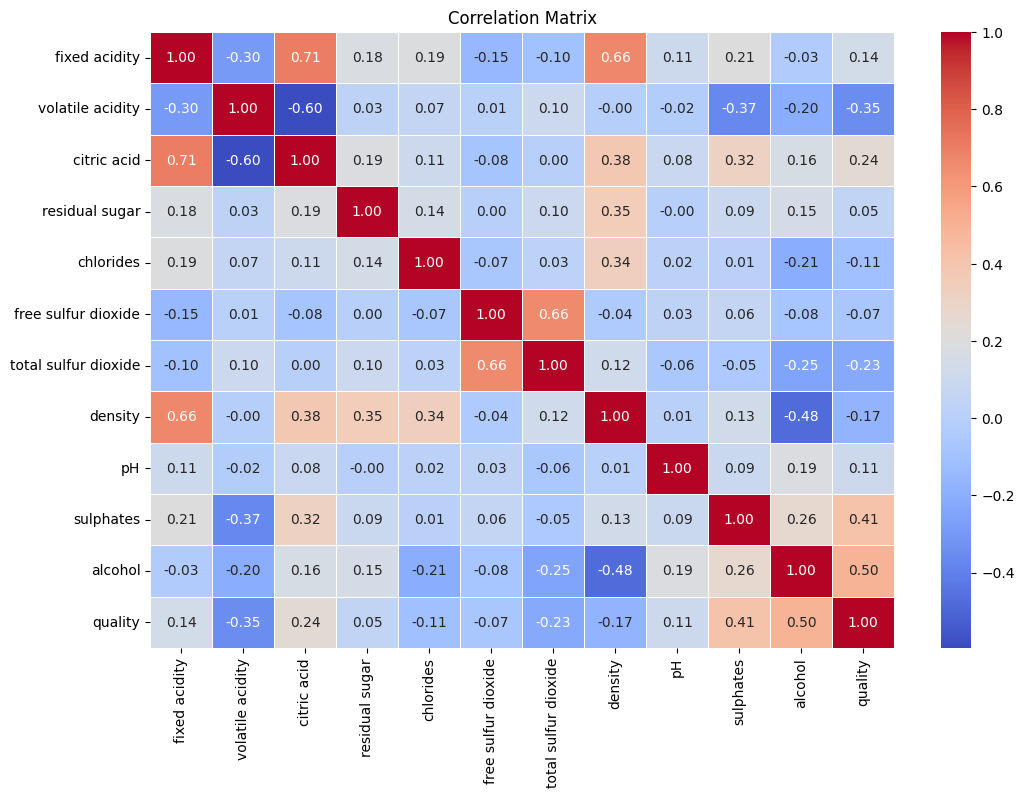

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data_cleaned' contains your cleaned dataset without missing values and outliers

# Calculate the correlation matrix
correlation_matrix = data_cleaned.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()



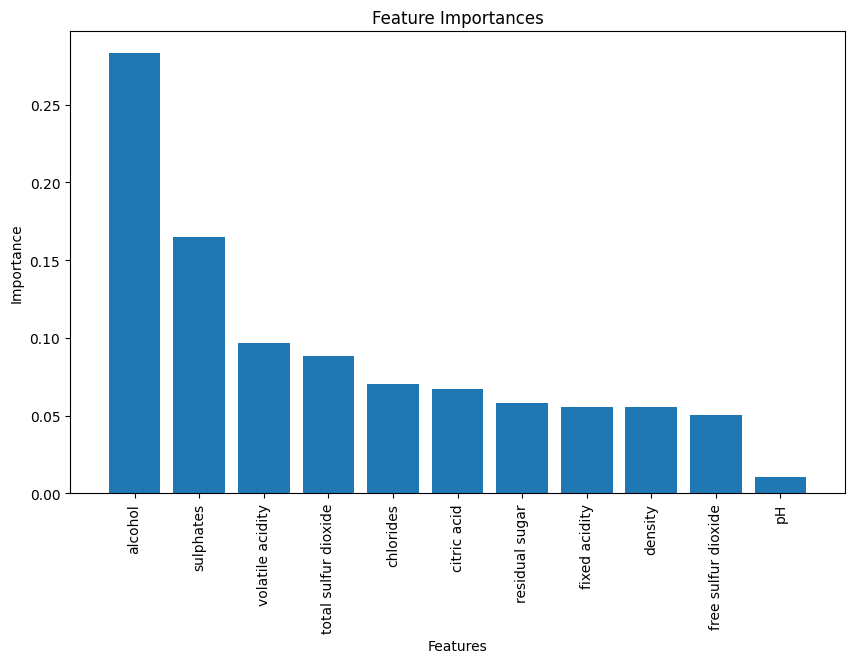

Top 5 features: Index(['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide',
       'chlorides'],
      dtype='object')


In [6]:
from sklearn.ensemble import RandomForestRegressor  # Change to RandomForestClassifier for classification
import matplotlib.pyplot as plt

# Assuming 'data_cleaned' contains your cleaned dataset without missing values and outliers
# Replace 'quality' with the target variable name and other variables as needed

# Split the data into features (X) and target variable (y)
X = data_cleaned.drop(columns=['quality'])  # Features
y = data_cleaned['quality']  # Target variable

# Initialize RandomForestRegressor (or RandomForestClassifier for classification)
rf_model = RandomForestRegressor()  # Change to RandomForestClassifier for classification

# Fit the model
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# Select top k features (optional)
k = 5  # Number of top features to select
top_k_features = X.columns[indices][:k]
print(f"Top {k} features: {top_k_features}")


In [7]:
# Assuming 'data_cleaned' contains your cleaned dataset without missing values and outliers
# Assuming 'top_k_features' contains the list of important features

# Drop features that are not important
data_selected_features = data_cleaned[top_k_features]

# Print the first few rows of the dataset with selected features
print(data_selected_features.head())


   alcohol  sulphates  volatile acidity  total sulfur dioxide  chlorides
0      9.4       0.56              0.70                  34.0      0.076
2      9.8       0.65              0.76                  54.0      0.092
4      9.4       0.56              0.70                  34.0      0.076
5      9.4       0.56              0.66                  40.0      0.075
6      9.4       0.46              0.60                  59.0      0.069


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

# Assuming 'data_selected_features' contains the dataset with only selected important features
# Assuming 'y' contains the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_selected_features, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Evaluate Linear Regression
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

print("Linear Regression Metrics:")
print(f"Mean Squared Error: {linear_mse}")
print(f"R^2 Score: {linear_r2}")




Linear Regression Metrics:
Mean Squared Error: 0.40904726381102074
R^2 Score: 0.34210504686245347


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define the range of hyperparameters to search
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Example values for alpha (regularization strength)
}

# Create a Ridge regression model
ridge_reg = Ridge()

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=ridge_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Train a Ridge regression model with the best hyperparameters
best_ridge_reg = Ridge(alpha=best_alpha)
best_ridge_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = best_ridge_reg.predict(X_test)

# Evaluate the model
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Metrics after Hyperparameter Tuning:")
print(f"Mean Squared Error: {ridge_mse}")
print(f"R^2 Score: {ridge_r2}")


Ridge Regression Metrics after Hyperparameter Tuning:
Mean Squared Error: 0.10126584768653865
R^2 Score: 0.2539552236933267


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

# Assuming 'data_selected_features' contains the dataset with only selected important features
# Assuming 'y' contains the target variable

# Convert target variable to categorical (for classification)
# Example: Binarizing quality into two categories: "good" (1) and "not good" (0) based on a threshold
threshold = 6  # Adjust threshold as needed
y_categorical = (y > threshold).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_selected_features, y_categorical, test_size=0.2, random_state=42)

# Logistic Regression
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, y_train)
y_pred_logistic = logistic_reg.predict(X_test)

# Evaluate Logistic Regression
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_classification_report = classification_report(y_test, y_pred_logistic)
logistic_confusion_matrix = confusion_matrix(y_test, y_pred_logistic)

print("\nLogistic Regression Metrics:")
print(f"Accuracy: {logistic_accuracy}")
print("Classification Report:")
print(logistic_classification_report)
print("Confusion Matrix:")
print(logistic_confusion_matrix)



Logistic Regression Metrics:
Accuracy: 0.8767605633802817
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       238
           1       0.82      0.30      0.44        46

    accuracy                           0.88       284
   macro avg       0.85      0.65      0.69       284
weighted avg       0.87      0.88      0.85       284

Confusion Matrix:
[[235   3]
 [ 32  14]]
